<a href="https://colab.research.google.com/github/wilmerod/Curso-de-introduccion-a-Big-Data-Parte-1-nov2021/blob/main/Mod3_T3_1_Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de regresión lineal con Scikit learn



## Importamos las librerías que necesitamos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Carga de los datos

In [ ]:
# Creamos el Dataframe a partir de tres listas

equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

df = pd.DataFrame(zip(equipos,bateos,runs), columns = ['equipos','bateos','runs'])

# También podemos crearlo a partir de un diccionario
#df = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})

## Exploración y visualización

In [ ]:
df.head(7)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762
5,New_S.,5600,718
6,New_Y.,5518,867


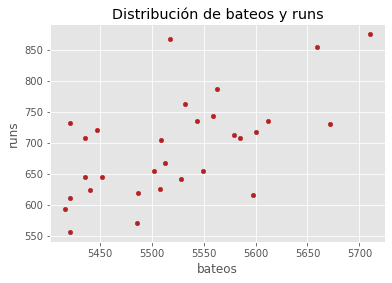

In [ ]:
df.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
   title = 'Distribución de bateos y runs'
)

In [ ]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'Distribución de bateos y runs')

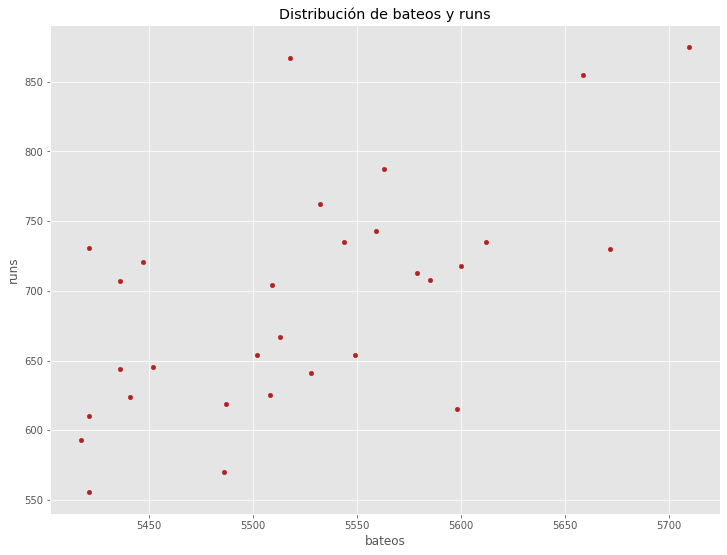

In [ ]:
fig, ax = plt.subplots(figsize=(12, 9))

df.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs')

## Creación del modelo

In [ ]:
X = df[['bateos']]
y = df['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

model = LinearRegression()

## Entrenamiento o ajuste

In [ ]:
model.fit(X = X_train.reshape(-1, 1), y = y_train)

print("Intercept:", model.intercept_)
print("Coeficiente:", list(zip(X.columns, model.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", model.score(X, y))

Intercept: [-2367.7028413]
Coeficiente: [('bateos', 0.5528713534479736)]
Coeficiente de determinación R^2: 0.3586119899498744


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## Cálculo del error

In [ ]:
prediction = model.predict(X = X_test)
print(prediction[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediction,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[643.78742093]
 [720.0836677 ]
 [690.78148597]]

El error (rmse) de test es: 59.336716083360486


## Representación de la predicción

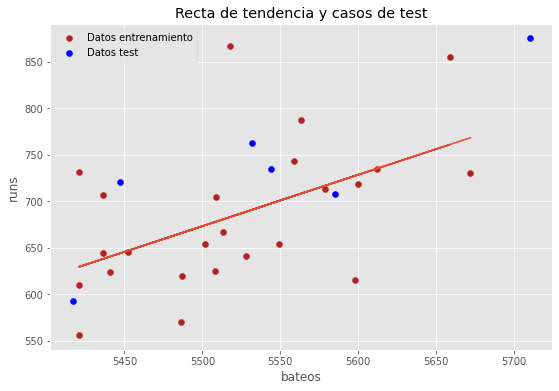

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.scatter(X_train, y_train, marker = 'o', color = 'firebrick', label = 'Datos entrenamiento')
ax.scatter(X_test, y_test, marker = 'o', color = 'blue', label = 'Datos test')
ax.plot(X_train, model.predict(X = X_train))

ax.set_title('Recta de tendencia y casos de test')
plt.xlabel('bateos')
plt.ylabel('runs')
plt.legend(loc = 2)

Inspirado en ejemplo de [cienciadatos.net](https://www.cienciadedatos.net/)
Ir a la sección de regresión lineal en [cienciadedatos.net](https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html) para saber más y ver el ejemplo en mayor profundidad.